# Ejercicio 5.3

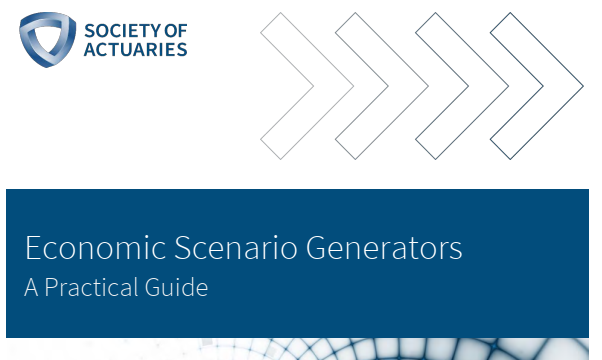

Ejercicio obtenido de **Economic Scenario Generators. A Practical Guide** (pags 26-28), *Society of actuaries, 2016*

*Nota: En el paper, la fórmula de la $\sigma$ en verdad es la varianza $V(X)$, faltaría aplicar la raíz cuadrada aunque el resultado final es válido.*

---

Supongamos que para un evento dado, el tamaño de la distribución de pérdidas (gravedad) de nuestra línea de negocio se describe mejor mediante una distribución gamma de $\alpha$ = 7 y $\lambda$ = 0.0025.\\
La distribución gamma ($\Gamma$ como un escalar) con parámetros forma = $\lambda$ y escala = $\alpha$ tiene como función de densidad:
\begin{equation*}
f(x) = \lambda e^{-\lambda x} \frac{(\lambda x)^{\alpha-1}}{\Gamma(\alpha)}
\end{equation*}
El valor esperado (media) y la varianza de una variable aleatoria x de distribución gamma son:
\begin{equation*}
\textbf{E(x)} = \alpha \theta = \alpha / \lambda \ \ \ y \ \ \ \textbf{Var(x)} = \alpha \theta^2 = \alpha / \lambda^2 %\sigma^2
\end{equation*}
Se pide:
* Calcular la media y la desviación estándar de la siniestralidad total

In [1]:
import numpy as np
import scipy.stats as st

alpha = 7.
lamdba = 0.0025
theta = 1/lamdba

In [2]:
# Opcion 1:
mean = alpha / lamdba
var = alpha / (lamdba ** 2)
std = np.sqrt(var)
print(mean, std)

2800.0 1058.3005244258363


*En Scipy (st.gamma), los parámetros de la gamma son: a=alpha y scale=1/lamdba (theta)*

In [3]:
# Opcion 2:
print(st.gamma.mean(a=alpha, scale=1/lamdba), st.gamma.std(a=alpha, scale=1/lamdba))

2800.0 1058.3005244258363


In [4]:
# Opcion 3:
siniestralidad = st.gamma(a=alpha, scale=1/lamdba)
print(siniestralidad.mean(), siniestralidad.std())

2800.0 1058.3005244258363


In [5]:
# Opcion 4: 
m, v = siniestralidad.stats('mv')
print(m,np.sqrt(v))

2800.0 1058.3005244258363


* Calcular la siniestralidad esperada en los siguientes percentiles: 90th, 95th, 99th, 99.6th y 99.8th 

*Los percentiles de una distribución corresponde con el .ppf (función de punto porcentual). 
Ejemplo: st.gamma.ppf(0.5,a=alpha,scale=1/lambda)*

In [6]:
percentiles = (0.5, 0.9, 0.95, 0.99, 0.996, 0.998)

for i in percentiles:
    print('El percentil %.2f teorico es %.2f' % (i, st.gamma.ppf(i, a=alpha, scale=1/lamdba)))

El percentil 0.50 teorico es 2667.85
El percentil 0.90 teorico es 4212.83
El percentil 0.95 teorico es 4736.96
El percentil 0.99 teorico es 5828.25
El percentil 1.00 teorico es 6400.92
El percentil 1.00 teorico es 6818.26


* Aplicar 10.000 simulaciones aleatorias con numpy (np.random.gamma) y calcular los anteriores percentiles.

*Los parámetros de numpy son np.random.gamma(alpha, 1/lamdba, size=10000)*

In [7]:
s = np.random.gamma(alpha, theta, size=10000)
for i in percentiles:
    # los percentiles en np.percentile van de 0 a 100
    print('El percentil %.2f de la simulacion es %.2f' % (i,(np.percentile(s, i*100))))

El percentil 0.50 de la simulacion es 2678.82
El percentil 0.90 de la simulacion es 4246.47
El percentil 0.95 de la simulacion es 4741.76
El percentil 0.99 de la simulacion es 5800.23
El percentil 1.00 de la simulacion es 6354.10
El percentil 1.00 de la simulacion es 6758.37


Mostramos la gráfica de la distribución:

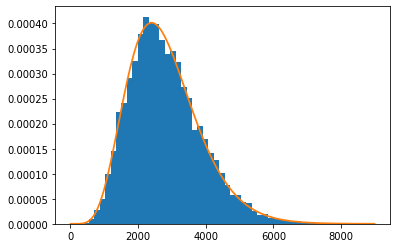

In [8]:
import matplotlib.pyplot as plt

plt.hist(s, 50, density=True)
x = np.linspace (0, 9000, 200) 
y = st.gamma.pdf(x, a=alpha, scale=1/lamdba)
plt.style.use('seaborn')
plt.plot(x, y)
plt.show()